#**ANALISIS SENTIMEN STARBUCKS**

In [362]:
import numpy as np
import pandas as pd

In [363]:
df = pd.read_csv("reviews_data.csv")

In [364]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [365]:
df.shape

(850, 6)

**MENCARI MISSING VALUES**

In [366]:
df.isnull().sum()

,0
name,0
location,0
Date,0
Rating,145
Review,0
Image_Links,0


In [367]:
df.isnull().sum().sort_values(ascending=False)

,0
Rating,145
name,0
location,0
Date,0
Review,0
Image_Links,0


In [368]:
df.dropna(inplace=True)

In [369]:
df.isnull().sum().sort_values(ascending=False)

,0
name,0
location,0
Date,0
Rating,0
Review,0
Image_Links,0


**Mengecek Dataset Balance or inbalance**

In [370]:
df["Rating"].value_counts()

,count
Rating,
1.0,451
2.0,99
5.0,83
4.0,39
3.0,33


In [371]:
df = df[df["Rating"] != 3]

In [372]:
df["Rating"].value_counts()

,count
Rating,
1.0,451
2.0,99
5.0,83
4.0,39


In [373]:
df["Positively Rated"]= np.where(df["Rating"] > 3, 1, 0)

<ipython-input-373-e9c5b4c0c88a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positively Rated"]= np.where(df["Rating"] > 3, 1, 0)


In [374]:
df["Positively Rated"].value_counts()

,count
Positively Rated,
0,550
1,122


In [375]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Positively Rated
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1


**Menghitung Jumlah Karakter untuk setiap entri ulasan**

In [376]:
df['char_count']=df['Review'].apply(len)

<ipython-input-376-41e9e789f34c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count']=df['Review'].apply(len)


In [377]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Positively Rated,char_count
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1,331
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1,555
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1,351
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1,441
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1,405


**Menghitung Jumlah kata untuk setiap entri ulasan**

In [378]:
df['word_count']=df['Review'].apply(lambda x :len(str(x).split()))

<ipython-input-378-5dfd1399dcda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count']=df['Review'].apply(lambda x :len(str(x).split()))


In [379]:
from wordcloud import WordCloud

In [380]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Positively Rated,char_count,word_count
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1,331,60
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1,555,105
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1,351,72
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1,441,86
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1,405,74


# **DATA CLEANING**

In [381]:
import re

In [382]:
df['Review'][1]

'** at the Starbucks by the fire station on 436 in Altamonte Springs, FL made my day and finally helped me figure out the way to make my drink so I’d love it. She took time out to talk to me for 2 minutes to make my experience better than what I’m used to. It was much appreciated! I’ve had bad experiences one after another at the Starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. Niko was refreshing to speak to and pleasant. The drink was perfect! Store 11956'

In [383]:
review = re.sub('[^a-zA-Z]',' ',df['Review'][1])

In [384]:
review

'   at the Starbucks by the fire station on     in Altamonte Springs  FL made my day and finally helped me figure out the way to make my drink so I d love it  She took time out to talk to me for   minutes to make my experience better than what I m used to  It was much appreciated  I ve had bad experiences one after another at the Starbucks that s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas  Niko was refreshing to speak to and pleasant  The drink was perfect  Store      '

**Pembagian Data Training dan Data Testing**

In [385]:
from re import X
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["Review"], df["Positively Rated"], test_size=0.4, random_state=0)
print('Train_set', x_train.shape, y_train.shape)
print('Test_set', x_test.shape, y_test.shape)

Train_set (403,) (403,)
Test_set (269,) (269,)


# #**1. Mengubah ulasan menjadi huruf kecil**

In [386]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

In [387]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [388]:
review = review.lower()

In [389]:
review

'   at the starbucks by the fire station on     in altamonte springs  fl made my day and finally helped me figure out the way to make my drink so i d love it  she took time out to talk to me for   minutes to make my experience better than what i m used to  it was much appreciated  i ve had bad experiences one after another at the starbucks that s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas  niko was refreshing to speak to and pleasant  the drink was perfect  store      '

In [390]:
lower = set(review.lower().split())

total_lower = 0

for word in review:
  tokens = word_tokenize(df['Review'].astype(str).str.cat(sep=' '))
  total_lower += len(tokens)
print(f"Total lower: {total_lower}")

Total lower: 38933250


In [391]:
from sklearn.preprocessing import MinMaxScaler

In [392]:
scaler = MinMaxScaler()
df['char_count'] = scaler.fit_transform(df[['char_count']])

In [393]:
total_atribut_baru = df['char_count'].sum()

In [394]:
print("Jumlah attribute baru:", total_atribut_baru)

Jumlah attribute baru: 278.8875326939843


In [395]:
review = review.split()

In [396]:
review

['at',
 'the',
 'starbucks',
 'by',
 'the',
 'fire',
 'station',
 'on',
 'in',
 'altamonte',
 'springs',
 'fl',
 'made',
 'my',
 'day',
 'and',
 'finally',
 'helped',
 'me',
 'figure',
 'out',
 'the',
 'way',
 'to',
 'make',
 'my',
 'drink',
 'so',
 'i',
 'd',
 'love',
 'it',
 'she',
 'took',
 'time',
 'out',
 'to',
 'talk',
 'to',
 'me',
 'for',
 'minutes',
 'to',
 'make',
 'my',
 'experience',
 'better',
 'than',
 'what',
 'i',
 'm',
 'used',
 'to',
 'it',
 'was',
 'much',
 'appreciated',
 'i',
 've',
 'had',
 'bad',
 'experiences',
 'one',
 'after',
 'another',
 'at',
 'the',
 'starbucks',
 'that',
 's',
 'closest',
 'to',
 'me',
 'in',
 'my',
 'work',
 'building',
 'with',
 'my',
 'drinks',
 'not',
 'being',
 'great',
 'along',
 'with',
 'not',
 'great',
 'customer',
 'service',
 'from',
 'specific',
 'baristas',
 'niko',
 'was',
 'refreshing',
 'to',
 'speak',
 'to',
 'and',
 'pleasant',
 'the',
 'drink',
 'was',
 'perfect',
 'store']

# #**2. Melakukan Tokenisasi**

In [397]:
import nltk
from nltk.tokenize import word_tokenize

In [398]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [399]:
df['sent_count']=df['Review'].apply(lambda x :len(nltk.sent_tokenize(str(x))))

In [400]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Positively Rated,char_count,word_count,sent_count
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1,0.276373,60,4
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1,0.471665,105,7
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1,0.293810,72,3
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1,0.372276,86,8
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1,0.340889,74,7


In [401]:
df_list = [df]

In [402]:
total_token = 0

In [403]:
for df in df_list:
  tokens = word_tokenize(df['Review'].astype(str).str.cat(sep=' '))
  total_token += len(tokens)

In [404]:
print(f"Jumlah token: {total_token}")

Jumlah token: 70150


In [405]:
def tokenisasi_kalimat(kalimat):
  kalimat_tokenized = word_tokenize(kalimat)
  return kalimat_tokenized

In [406]:
df['tokens'] = df['Review'].apply(tokenisasi_kalimat)

In [407]:
total_tokens = df['Review'].apply(len).sum()

In [408]:
print("Total attribute token di seluruh data:", total_tokens)

Total attribute token di seluruh data: 329292


# #**3. Melakukan Stopwords**

In [409]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [410]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [411]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [412]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [413]:
stop_words = set(stopwords.words('english'))

In [414]:
total_stopwords = 0

for word in review:
  tokens = word_tokenize(df['Review'].astype(str).str.cat(sep=' '))
  total_stopwords += len(tokens)
print(f"Total stopwords: {total_stopwords}")

Total stopwords: 7365750


**Menghapus Stopwords dari ulasan khusus untuk menghilangkan informasi tingkat rendah dari teks sehingga memungkinkan lebih fokus pada konten yang penting**

In [415]:
review = [word for word in review if word not in set(all_stopwords)]

In [416]:
review

['starbucks',
 'fire',
 'station',
 'altamonte',
 'springs',
 'fl',
 'made',
 'day',
 'finally',
 'helped',
 'figure',
 'way',
 'make',
 'drink',
 'love',
 'took',
 'time',
 'talk',
 'minutes',
 'make',
 'experience',
 'better',
 'used',
 'much',
 'appreciated',
 'bad',
 'experiences',
 'one',
 'another',
 'starbucks',
 'closest',
 'work',
 'building',
 'drinks',
 'not',
 'great',
 'along',
 'not',
 'great',
 'customer',
 'service',
 'specific',
 'baristas',
 'niko',
 'refreshing',
 'speak',
 'pleasant',
 'drink',
 'perfect',
 'store']

**Menghitung jumlah keseluruhan attribute stopword**

In [417]:
stop_words = set(stopwords.words('english'))

In [418]:
def count_stopwords(text):
  tokens = text.lower().split()
  return sum(1 for word in tokens if word in stop_words)

In [419]:
stopword_counts = [count_stopwords(doc) for doc in df['Review']]

In [420]:
total_stopwords = sum(stopword_counts)

In [421]:
print("Jumlah stopword pada seluruh data:", stopword_counts)
print("Total stopword:", total_stopwords)

Jumlah stopword pada seluruh data: [32, 47, 36, 42, 34, 32, 23, 52, 21, 32, 58, 34, 34, 94, 52, 50, 43, 22, 34, 23, 54, 36, 86, 19, 27, 78, 57, 27, 56, 24, 38, 36, 54, 23, 28, 83, 26, 51, 48, 82, 48, 28, 60, 15, 18, 88, 45, 42, 69, 35, 11, 79, 41, 19, 25, 23, 47, 15, 69, 60, 1, 62, 29, 71, 42, 50, 57, 39, 10, 70, 68, 38, 42, 21, 31, 16, 63, 13, 56, 97, 74, 22, 32, 60, 22, 28, 48, 20, 28, 31, 39, 34, 18, 41, 62, 22, 1, 19, 24, 14, 41, 64, 41, 34, 27, 22, 73, 26, 15, 70, 51, 19, 16, 19, 26, 38, 66, 49, 65, 22, 36, 29, 23, 20, 35, 53, 34, 29, 50, 43, 47, 21, 59, 41, 62, 67, 29, 16, 59, 43, 86, 58, 28, 27, 68, 33, 89, 56, 66, 78, 18, 22, 49, 30, 25, 71, 30, 31, 43, 55, 50, 28, 44, 14, 45, 52, 23, 76, 59, 47, 34, 57, 25, 58, 61, 31, 20, 49, 51, 65, 79, 17, 76, 58, 91, 18, 56, 31, 61, 60, 35, 45, 75, 28, 38, 47, 76, 26, 34, 19, 21, 74, 44, 24, 26, 28, 62, 20, 34, 59, 53, 40, 19, 38, 60, 19, 28, 78, 19, 63, 38, 71, 32, 58, 57, 82, 77, 37, 90, 59, 57, 23, 37, 42, 66, 62, 22, 60, 18, 23, 25, 89

In [422]:
X = vectorizer.fit_transform(df['Review'])

In [423]:
print("Fitur (Kata Unik):", vectorizer.get_feature_names_out())
print("Jumlah Fitur (Kata Unik):", len(vectorizer.get_feature_names_out()))

Fitur (Kata Unik): ['00' '000' '000php' ... 'zeeb' 'zero' 'zit']
Jumlah Fitur (Kata Unik): 5390


**Menghitung rata-rata jumlah karakter untuk positive review dan negative review**

In [424]:
df[df['Positively Rated']==1]['char_count'].mean()

0.2733645861620478

In [425]:
df[df['Positively Rated']==0]['char_count'].mean()

0.44643100578584455

# #**4. Melakukan N-Gram**

**Menghitung Uni-gram, Bi-gram dan Tri-gram**

In [426]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

In [427]:
tokens = word_tokenize(df['Review'][0])

In [428]:
unigram = list(ngrams(tokens,1))
print("Unigram:", unigram)

Unigram: [('Amber',), ('and',), ('LaDonna',), ('at',), ('the',), ('Starbucks',), ('on',), ('Southwest',), ('Parkway',), ('are',), ('always',), ('so',), ('warm',), ('and',), ('welcoming',), ('.',), ('There',), ('is',), ('always',), ('a',), ('smile',), ('in',), ('their',), ('voice',), ('when',), ('they',), ('greet',), ('you',), ('at',), ('the',), ('drive-thru',), ('.',), ('And',), ('their',), ('customer',), ('service',), ('is',), ('always',), ('spot-on',), (',',), ('they',), ('always',), ('get',), ('my',), ('order',), ('right',), ('and',), ('with',), ('a',), ('smile',), ('.',), ('I',), ('would',), ('actually',), ('give',), ('them',), ('more',), ('than',), ('5',), ('stars',), ('if',), ('they',), ('were',), ('available',), ('.',)]


In [429]:
total_unigram = len(unigram)
print("Total Unigram:", total_unigram)

Total Unigram: 65


In [430]:
bigram = list(ngrams(tokens,2))
print("Bigram:", bigram)

Bigram: [('Amber', 'and'), ('and', 'LaDonna'), ('LaDonna', 'at'), ('at', 'the'), ('the', 'Starbucks'), ('Starbucks', 'on'), ('on', 'Southwest'), ('Southwest', 'Parkway'), ('Parkway', 'are'), ('are', 'always'), ('always', 'so'), ('so', 'warm'), ('warm', 'and'), ('and', 'welcoming'), ('welcoming', '.'), ('.', 'There'), ('There', 'is'), ('is', 'always'), ('always', 'a'), ('a', 'smile'), ('smile', 'in'), ('in', 'their'), ('their', 'voice'), ('voice', 'when'), ('when', 'they'), ('they', 'greet'), ('greet', 'you'), ('you', 'at'), ('at', 'the'), ('the', 'drive-thru'), ('drive-thru', '.'), ('.', 'And'), ('And', 'their'), ('their', 'customer'), ('customer', 'service'), ('service', 'is'), ('is', 'always'), ('always', 'spot-on'), ('spot-on', ','), (',', 'they'), ('they', 'always'), ('always', 'get'), ('get', 'my'), ('my', 'order'), ('order', 'right'), ('right', 'and'), ('and', 'with'), ('with', 'a'), ('a', 'smile'), ('smile', '.'), ('.', 'I'), ('I', 'would'), ('would', 'actually'), ('actually', '

In [431]:
total_bigram = len(bigram)
print("Total Bigram:", total_bigram)

Total Bigram: 64


In [432]:
trigram = list(ngrams(tokens, 3))
print("Trigram:", trigram)

Trigram: [('Amber', 'and', 'LaDonna'), ('and', 'LaDonna', 'at'), ('LaDonna', 'at', 'the'), ('at', 'the', 'Starbucks'), ('the', 'Starbucks', 'on'), ('Starbucks', 'on', 'Southwest'), ('on', 'Southwest', 'Parkway'), ('Southwest', 'Parkway', 'are'), ('Parkway', 'are', 'always'), ('are', 'always', 'so'), ('always', 'so', 'warm'), ('so', 'warm', 'and'), ('warm', 'and', 'welcoming'), ('and', 'welcoming', '.'), ('welcoming', '.', 'There'), ('.', 'There', 'is'), ('There', 'is', 'always'), ('is', 'always', 'a'), ('always', 'a', 'smile'), ('a', 'smile', 'in'), ('smile', 'in', 'their'), ('in', 'their', 'voice'), ('their', 'voice', 'when'), ('voice', 'when', 'they'), ('when', 'they', 'greet'), ('they', 'greet', 'you'), ('greet', 'you', 'at'), ('you', 'at', 'the'), ('at', 'the', 'drive-thru'), ('the', 'drive-thru', '.'), ('drive-thru', '.', 'And'), ('.', 'And', 'their'), ('And', 'their', 'customer'), ('their', 'customer', 'service'), ('customer', 'service', 'is'), ('service', 'is', 'always'), ('is',

In [433]:
total_trigram = len(trigram)
print("Total Trigram:", total_trigram)

Total Trigram: 63


In [434]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

def hitung_ngram(text, n):
    tokens = word_tokenize(text)
    unigram = list(ngrams(tokens, 1))
    bigram = list(ngrams(tokens, 2))
    trigram = list(ngrams(tokens, 3))

    return len(unigram), len(bigram), len(trigram)

kalimat_list = df['Review'].tolist()

unigram_list = []
bigram_list = []
trigram_list = []

for kalimat in kalimat_list:
    unigram, bigram, trigram = hitung_ngram(kalimat, 1)
    unigram_list.append(unigram)
    bigram_list.append(bigram)
    trigram_list.append(trigram)

print("Jumlah Unigram:", sum(unigram_list))
print("Jumlah Bigram:", sum(bigram_list))
print("Jumlah Trigram:", sum(trigram_list))

Jumlah Unigram: 70154
Jumlah Bigram: 69482
Jumlah Trigram: 68810


**Menghitung total attribute Unigram, Bigram dan Trigram**

In [435]:
from sklearn.feature_extraction.text import CountVectorizer

In [436]:
def count_ngrams(df, ngram_range):
  vectorizer = CountVectorizer(ngram_range=ngram_range)
  X = vectorizer.fit_transform(df['Review'])
  print(f"Fitur (n-gram): {vectorizer.get_feature_names_out()}")
  print(f"Jumlah Atribut (n-gram): {len(vectorizer.get_feature_names_out())}")
  return X

In [437]:
print("Unigram:")
unigram_count = count_ngrams(df, (1, 1))
print("Bigram:")
bigram_count = count_ngrams(df, (2, 2))
print("Trigram:")
trigram_count = count_ngrams(df, (3, 3))

Unigram:
Fitur (n-gram): ['00' '000' '000php' ... 'zeeb' 'zero' 'zit']
Jumlah Atribut (n-gram): 5390
Bigram:
Fitur (n-gram): ['00 am' '00 and' '00 back' ... 'zero stars' 'zero stocks' 'zit faced']
Jumlah Atribut (n-gram): 32540
Trigram:
Fitur (n-gram): ['00 am across' '00 am on' '00 am they' ... 'zero stars if'
 'zero stocks and' 'zit faced teenager']
Jumlah Atribut (n-gram): 50510


# **#5. STEMMING : untuk memetakan berbagai variasi kata ke command rules/ akar kata yang sama yang dapat membantu dalam mengelompokkan kata kata yang mirip dan menyederhanakan analisis teks dalam stemming**

In [438]:
from nltk.stem.porter import PorterStemmer

In [439]:
ps = PorterStemmer()

In [440]:
review = [ps.stem(word) for word in review]

In [441]:
review = " ".join(review)

In [442]:
review

'starbuck fire station altamont spring fl made day final help figur way make drink love took time talk minut make experi better use much appreci bad experi one anoth starbuck closest work build drink not great along not great custom servic specif barista niko refresh speak pleasant drink perfect store'

In [443]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

custom_stopwords = {'don', "don't", 'ain','aren',"aren't",'couldn',"couldn't",
                    'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",
                    'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",
                    'needn',"needn't",'shan',"shan't", 'no', 'nor', 'not', 'shouldn',"shouldn't",
                    'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for index, row in df.iterrows():
    review = re.sub('[^a-zA-Z]',' ',row['Review'])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [444]:
df['processed_text']=corpus

In [445]:
df.head()

,name,location,Date,Rating,Review,Image_Links,Positively Rated,char_count,word_count,sent_count,tokens,processed_text
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1,0.276373,60,4,"[Amber, and, LaDonna, at, the, Starbucks, on, ...",amber ladonna starbuck southwest parkway alway...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1,0.471665,105,7,"[*, *, at, the, Starbucks, by, the, fire, stat...",starbuck fire station altamont spring fl made ...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1,0.293810,72,3,"[I, just, wanted, to, go, out, of, my, way, to...",want go way recogn starbuck employe billi fran...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1,0.372276,86,8,"[Me, and, my, friend, were, at, Starbucks, and...",friend starbuck card didn work thank worker pa...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1,0.340889,74,7,"[I, ’, m, on, this, kick, of, drinking, 5, cup...",kick drink cup warm water work instacart right...


In [446]:
!pip install Sastrawi

In [447]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [448]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [449]:
def stemming_kalimat(kalimat):
  kalimat_stemmed = stemmer.stem(kalimat)
  return kalimat_stemmed

In [450]:
df['hasil_stemming'] = df['processed_text'].apply(stemming_kalimat)

In [451]:
total_kata_stemmed = df['hasil_stemming'].str.split().apply(len).sum()

In [452]:
print("Total kata setelah stemming untuk keseluruhan data:", total_kata_stemmed)

Total kata setelah stemming untuk keseluruhan data: 30407


**Menghitung jumlah attribute stemming**

In [453]:
stemmer = PorterStemmer()

In [454]:
def stem_text(text):
  tokens = nltk.word_tokenize(text.lower())
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return " ".join(stemmed_tokens)

In [455]:
stemmed_corpus = [stem_text(text) for text in df['Review']]

In [456]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_corpus)

In [457]:
print("Fitur (kata dasar setelah stemming):", vectorizer.get_feature_names_out())
print("Jumlah kata unik setelah stemming:", len(vectorizer.get_feature_names_out()))

Fitur (kata dasar setelah stemming): ['00' '000' '000php' ... 'zeeb' 'zero' 'zit']
Jumlah kata unik setelah stemming: 4038


**membuat plot untuk mengetahui kata-kata yang paling banyak muncul dalam dataset**

In [458]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")

In [459]:
pos = wc.generate(df[df['Positively Rated']==1]['Review'].str.cat(sep=' '))

In [460]:
import matplotlib.pyplot as plt

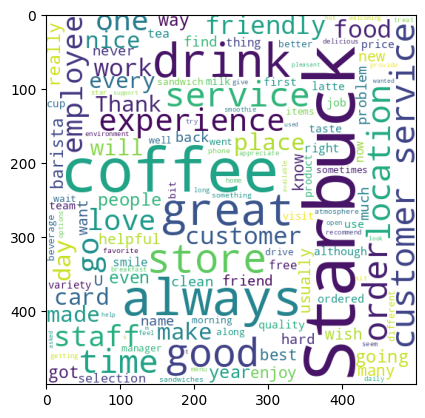

In [461]:
plt.imshow(pos)

In [462]:
negative = wc.generate(df[df['Positively Rated']==0]['Review'].str.cat(sep=' '))

In [463]:
from sklearn.model_selection import train_test_split

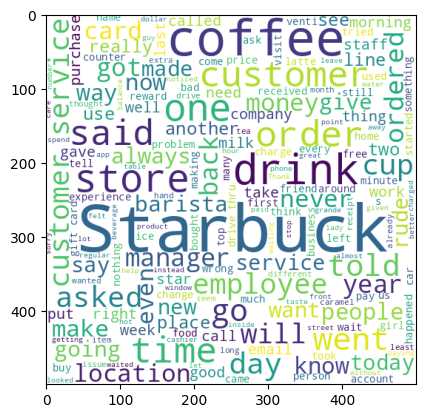

In [464]:
plt.imshow(negative)

In [465]:
X_train, X_test, y_train, y_test = train_test_split(df["Review"], df["Positively Rated"], random_state=0)

In [466]:
print(X_train)

258    I am suffering from a health condition where I...
246    With all the talk in the news about torture I ...
360    I'm tired of spending $5 on coffee and not bei...
285    I received my bank statement and noticed two b...
273    I feel that they have more breakfast items tha...
                             ...                        
9      Staff at the Smythe St. Superstore location in...
376    Starbucks retail locations in Hollywood, Calif...
198    I am a regular customer to one of your branche...
660    I have been coming to the Starbucks at 1503 NE...
588    I go to Starbucks, 68th & 1st ave in NYC. In m...
Name: Review, Length: 504, dtype: object


In [467]:
print(y_train)

258    0
246    0
360    0
285    0
273    1
      ..
9      0
376    0
198    0
660    0
588    0
Name: Positively Rated, Length: 504, dtype: int64


In [468]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df= 5, ngram_range=(1,2)).fit(X_train)

In [469]:
len(vect.get_feature_names_out())

1974

In [470]:
X_train_vectorized = vect.transform(X_train)

In [471]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

**MENYIMPAN PREDIKSI**

In [472]:
predictions = model.predict(vect.transform(X_test))

In [473]:
print(predictions)

[0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [474]:
print(y_test)

613    0
318    1
14     0
674    0
79     0
      ..
647    1
336    0
15     0
194    0
6      0
Name: Positively Rated, Length: 168, dtype: int64


In [475]:
# AUC
from sklearn.metrics import roc_auc_score
print("AUC score is", roc_auc_score(y_test, predictions))

AUC score is 0.8797101449275362


In [476]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()

In [477]:
print("Negative words", feature_names[sorted_coef_index[:10]])

Negative words ['no' 'in' 'rude' 'see' 'one' 'never' 'cup' 'off' 'stores' 'terrible']


In [478]:
print("Positive words", feature_names[sorted_coef_index[:-11:-1]])

Positive words ['great' 'always' 'service' 'although' 'also' 'usually' 'drinks' 'good'
 'wish' 'however']


# #**6. menggunakan algoritma Naive Bayes untuk menguji akurasi**

In [479]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [480]:
nb = GaussianNB()
nb.fit(X_train_vectorized.toarray(), y_train)
y_pred = nb.predict(vect.transform(X_test).toarray())

In [481]:
from sklearn.metrics import accuracy_score

In [482]:
accuracy_score(y_test, y_pred)

0.8452380952380952

#**CONFUSION MATRIX**

In [483]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [484]:
X = df['Review']
y = df['Positively Rated']
X_train, X_test, y_train, y_test = train_test_split(df["Review"], df["Positively Rated"], test_size=0.2, random_state=0)

In [485]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [486]:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

LogisticRegression()

In [487]:
y_pred = model.predict(X_test_vect)

In [488]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[109   1]
 [  4  21]]


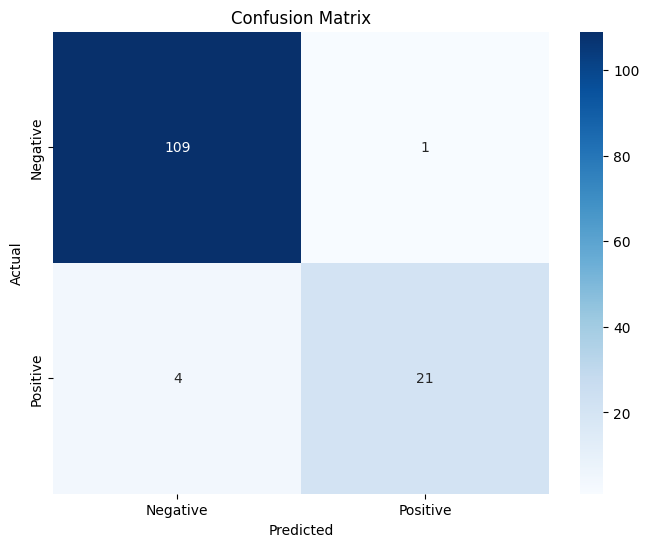

In [489]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [490]:
from sklearn.metrics import accuracy_score

In [491]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       110
           1       0.95      0.84      0.89        25

    accuracy                           0.96       135
   macro avg       0.96      0.92      0.94       135
weighted avg       0.96      0.96      0.96       135

